# Example Usage of `irrigation30`

In this notebook, you'll learn how to use the **irrigation30** package. We'll demo all of the functions in the package, including:

- Importing the package
- Authenticating with Google Earth Engine
- Instantiating the model
- Training the model and generating irrigation predictions
- Plotting the interactive map tool
- Plotting helper charts for: NDVI, temperature, precipitation
- Saving irrigation TIF assets to GEE and TIF files to Google Drive

## Import the package

First step is importing the `irrigation30` module. 

Note: you can also import the module functions directly with:

`from irrigation30 import authenticate, Irrigation30`. 

In [1]:
import irrigation30 as irr

## Authenticate with Google Earth Engine

Run this code to authenticate your GEE account. This will trigger your browser to open another page that asks you to sign-in to GEE and will provide a code to authorize your account. Copy the code and enter it into the input form below.

In [2]:
irr.authenticate()

Enter verification code: 4/2gG6qGqvPK7Ahg6ffKzzYW7mVLQ_8MVJb0ERqWznG4vi8wWxkCEPY0U

Successfully saved authorization token.


## Instantiating the Model

Next, we instantiate the model object `Irrigation30`. For this, you'll have to specify the region of interest with the arguments:

`center_lat`, `center_lon`, and `edge_len`. 

You can also use optional arguments `num_clusters` (range 2 to 10) and `year` (range 2017 to prior year).

In [3]:
# Latitude and Longitude of center point
# For this demo, we are using a coordinate in Idaho
lat = 43.771114
lon = -116.736866

# Edge length of region of interest box, in degrees
edge_len = 0.05

# Optional arguments --> Using default values
num_clusters = 2
year = 2018

# Instantiate the model
model = irr.Irrigation30(
    center_lat=lat, 
    center_lon=lon, 
    edge_len=edge_len, 
    num_clusters=num_clusters, 
    year=year 
)

The selected area is approximately 4.02 km by 5.56 km


## Fit the Model and Generate Irrigation Predictions

Next, we call the `fit_predict` function on our model to train our model and generate irrigation predictions for all 30m pixels in the region of interest. Note: this may take a few minutes.

In [4]:
%%time
model.fit_predict()

Model building...
Model complete!
CPU times: user 62.4 ms, sys: 3.26 ms, total: 65.7 ms
Wall time: 16.8 s


## Plot the Interactive Map

Next, we plot the interactive map to visualize the irrigation predictions and compare against relevant satellite data. In this map, there are a number of layers that you can toggle on and off:

- **Prediction**: The labels for each cluster trained in the unsupervised model. The irrigation and cluster color labels for each cluster is printed in the "Prediction Layer Legend" above the map. 
- **Sentinel2-Q**: The Sentinel-2 satellite images for each quarter of the year. 
- **GFSAD1000**: The irrigation labels at 1000m resolution from GFSAD1000.
- **NDVI**: The NDVI layers for each month of the year. 

Note: this may take a few minutes.

In [5]:
%%time
model.plot_map()

ADDED PREDICTION LAYER 		--> 0.17 min
ADDED S2 RGB LAYERS 		--> 0.07 min
ADDED GFSAD1000 LAYER 		--> 0.03 min
ADDED MONTHLY NDVI LAYERS 	--> 0.3 min

============ Prediction Layer Legend ============
Cluster 0 (red): 1-crop cycle annually | irrigated around Jun; 
Cluster 1 (blue): 1-crop cycle annually | irrigated around Jul; 
============ GFSAD1000 Layer Legend ============
Croplands: irrigation major (green)
Croplands: irrigation minor (lighter green)
Croplands: rainfed (yellow)
Croplands: rainfed, minor fragments (yellow orange)
Croplands: rainfed, rainfed, very minor fragments (orange)
CPU times: user 151 ms, sys: 32.1 ms, total: 183 ms
Wall time: 33.9 s


## Plot Charts for NDVI, Temperature and Precipitation

You can also plot line charts to visualize the monthly signatures of NDVI, Temperature, and Precipitation in your region of interest. 

#### Avg. NDVI Chart

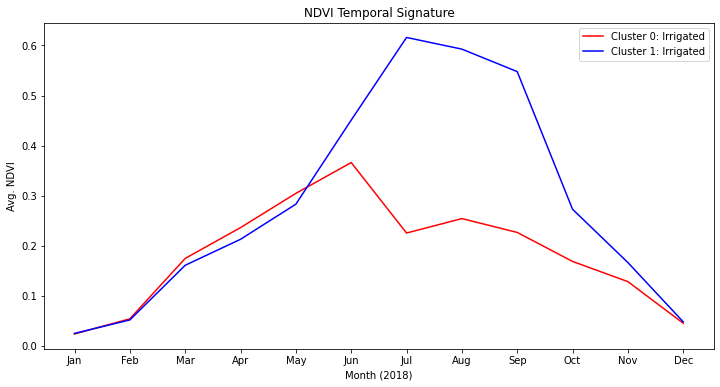

In [6]:
model.plot_avg_ndvi()

#### Precipitation Chart

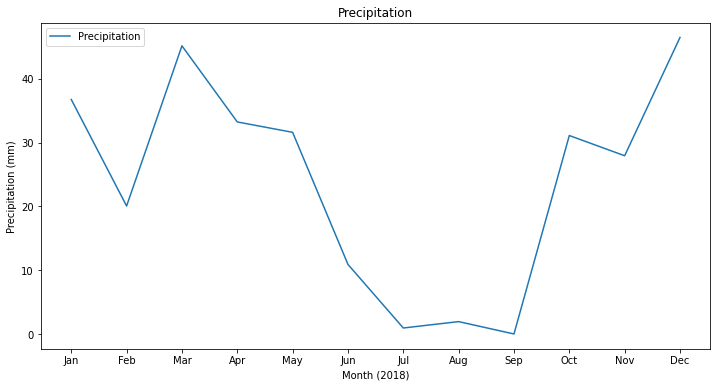

In [7]:
model.plot_precipitation()

#### Temperature Chart

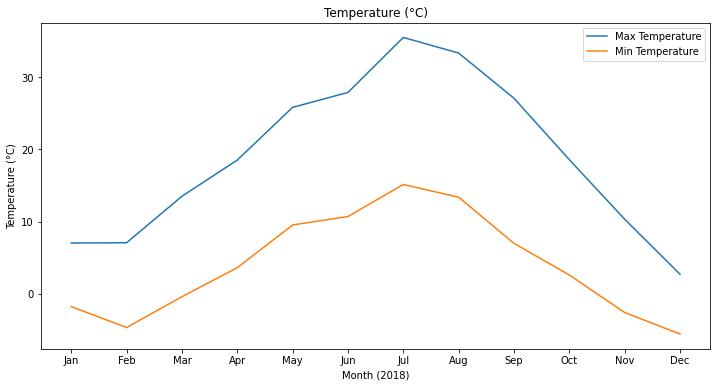

In [8]:
model.plot_temperature_max_min()

#### Get annual irrigation labels for each cluster

Note that a cluster is labelled as irrigated if it has at least one month that passes our NDVI/Precipitation criteria.

In [9]:
model.simple_label

['Irrigated', 'Irrigated']

## Save Irrigation Map Output to GEE TIF Asset

With the `write_image_asset` function, you can save the irrigation prediction map output to a TIF asset on Google Earth Engine. First set the directory (like `'users/<GEE_USERNAME>/'`) you want the asset to be stored in GEE using `set_asset_directory(dir)`.

In [10]:
# Set the directory you want your TIF asset to be stored in GEE
model.set_asset_directory("users/whawkins/")

BASE ASSET DIRECTORY: users/whawkins/


In [11]:
# Name of the image asset to be saved to GEE Assets
image_asset_id = "test_asset"

model.write_image_asset(image_asset_id)

BASE ASSET DIRECTORY: users/whawkins/
IMAGE ASSET PATH: users/whawkins/test_asset


You can also save just the cluster labels to the TIF asset by setting `write_simple_version=True`.

In [12]:
# Name of the TIF asset to be saved to GEE Assets
image_asset_id = "test_asset_simple"

# Save just the cluster labels with write_simple_version=True
model.write_image_asset(image_asset_id, write_simple_version=True)

BASE ASSET DIRECTORY: users/whawkins/
IMAGE ASSET PATH: users/whawkins/test_asset_simple


## Save Irrigation Map Output to TIF on Google Drive

With the `write_image_google_drive` function, you can save the irrigation prediction map output to a TIF file on your Google Drive. Make sure to set `base_asset_directory` to `'users/<GEE_USERNAME>/'` when instantiating the Irrigation30 model object. 

In [13]:
# Name of the TIF file to be saved to Google Drive
filename = "test_TIF"

model.write_image_google_drive(filename)

Writing To Google Drive filename =  test_TIF.tif


You can also save just the cluster labels to the TIF file by setting `write_simple_version=True`.

In [14]:
# Name of the TIF file to be saved to Google Drive
filename = "test_TIF_simple"

# Save just the cluster labels with write_simple_version=True
model.write_image_google_drive(filename, write_simple_version=True)

Writing To Google Drive filename =  test_TIF_simple.tif
